In [3]:
pip install tensorflow

  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl (390.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [14]:
model1 = Sequential(
    [
        Flatten(input_shape = (28,28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
v1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8813 - loss: 0.4220 - val_accuracy: 0.9594 - val_loss: 0.1390
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9655 - loss: 0.1168 - val_accuracy: 0.9685 - val_loss: 0.0994
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9761 - loss: 0.0781 - val_accuracy: 0.9722 - val_loss: 0.0863
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9826 - loss: 0.0560 - val_accuracy: 0.9743 - val_loss: 0.0765
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9881 - loss: 0.0416 - val_accuracy: 0.9764 - val_loss: 0.0753


In [19]:
model2 = Sequential(
    [
        Flatten(input_shape = (28,28)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='sigmoid'),
        Dense(10, activation='softmax')
    ]
)

C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
v2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8675 - loss: 0.4972 - val_accuracy: 0.9625 - val_loss: 0.1226
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9701 - loss: 0.1001 - val_accuracy: 0.9691 - val_loss: 0.0942
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9824 - loss: 0.0590 - val_accuracy: 0.9728 - val_loss: 0.0899
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9860 - loss: 0.0436 - val_accuracy: 0.9770 - val_loss: 0.0718
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9906 - loss: 0.0314 - val_accuracy: 0.9790 - val_loss: 0.0673


How to know when you are overfitting: In this case, while training and validation metrics are close, we see a small gap where training accuracy is slightly higher and training loss is slightly lower than their validation counterparts.

In [21]:
model3 = Sequential(
    [
        Flatten(input_shape = (28,28)),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='tanh'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
v3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8379 - loss: 0.5114 - val_accuracy: 0.9599 - val_loss: 0.1252
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9417 - loss: 0.1924 - val_accuracy: 0.9704 - val_loss: 0.1003
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9559 - loss: 0.1472 - val_accuracy: 0.9723 - val_loss: 0.0954
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9600 - loss: 0.1322 - val_accuracy: 0.9739 - val_loss: 0.0845
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9639 - loss: 0.1152 - val_accuracy: 0.9762 - val_loss: 0.0789


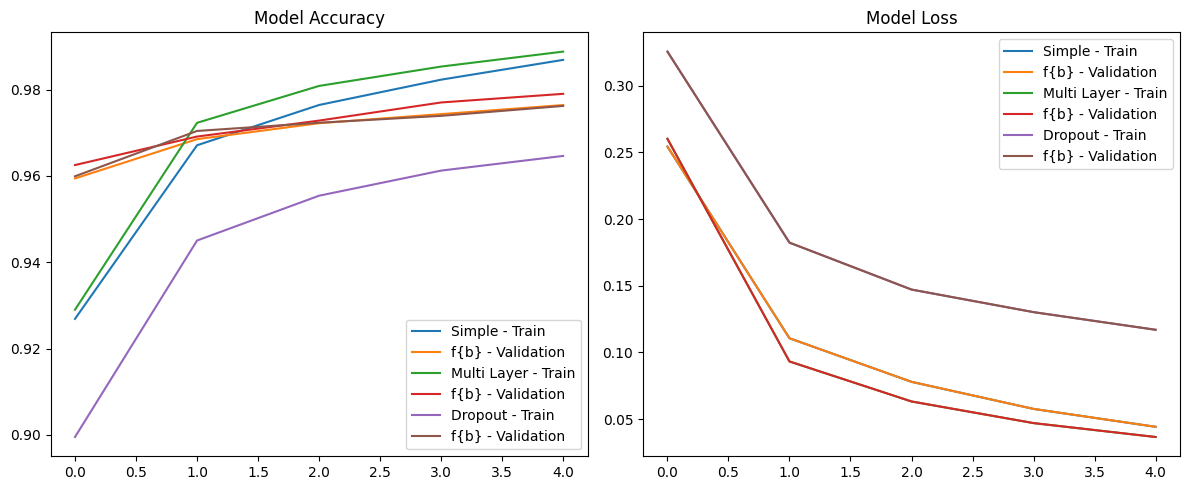

In [23]:
import matplotlib.pyplot as plt

def plot_metrics(versions, models):
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    for a,b in zip(versions, models):
        plt.plot(a.history['accuracy'], label=f'{b} - Train')
        plt.plot(a.history['val_accuracy'], label='f{b} - Validation')
    plt.title('Model Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    for a,b in zip(versions, models):
        plt.plot(a.history['loss'], label=f'{b} - Train')
        plt.plot(a.history['loss'], label='f{b} - Validation')
    plt.title('Model Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

versions = [v1, v2, v3]
models = ['Simple', 'Multi Layer', 'Dropout']

plot_metrics(versions, models)

In [24]:
import numpy as np

image = X_test[0]

prediction = model1.predict(np.expand_dims(image, axis=0))
predicted_class = prediction.argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


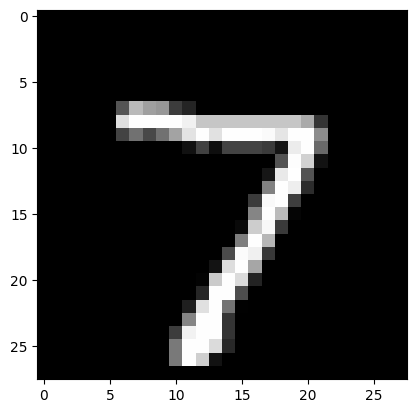

In [25]:
plt.imshow(image, cmap='gray')